<center> </center>

*"Talk is cheap. Show me the code."*    -- Linus Torvalds

In this note, I only present the necessary code corresponding to two files (they basically give the same content): `READE.md` and `energy_bands_interpretation.pdf`.
In python code, I'm going to use different `classes` to go through all we focus on, which is a typical characteristic for this powerful coding language.

We are going to three aspects here: hydrogen atom, silicon and graphene.

# Import libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np

plt.rcParams["font.family"] = "Helvetica"
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


# Energy levels of a hydrogen atom 

In python programming, you can write *classes* representing objects in the real world. For example, you can write a *class* `HydrogenAtom`, and then create an instance of it to represent a specific hydrogen atom. And you can write a *method* `plot_energy_levels` in `HydrogenAtom` to plot the energy levels of the hydrogen atom.

In [2]:
class HydrogenAtom(object):
    """Class of hydrogen atom.
    """

    def __init__(self,
                 m: float = 9.10939e-31,
                 hbar: float = 1.0545718e-34,
                 e: float = 1.60218e-19,
                 epsilon0: float = 8.85419e-12):
        """Initialize the class with some attributes and fundamental constants.

        Args:
            m (float, optional): mass of electron.
            hbar (float, optional): Planck's constant. 
            e (float, optional): charge of electron.
            epsilon0 (float, optional): permittivity of space.
        """
        self.m = m
        self.hbar = hbar
        self.e = e
        self.epsilon0 = epsilon0

    def plot_energy_levels(self,
                           N: int = 5):
        """Plot energy levels of a hydrogen atom.

        Args:
            N (int, optional): number of energy levels to plot.
        """
        x = [1]
        n = np.arange(1, N+1, 1)
        energy = (-self.m * self.e**3 / (2 * self.hbar **
                  2 * 16*np.pi**2 * self.epsilon0**2 * n**2))

        # Plot the energy levels.
        fig, ax = plt.subplots(1, 1, figsize=(2.5, 3))
        ax.eventplot(energy, orientation='vertical',
                     lineoffsets=x, linelength=1, linewidths=0.5)
        ax.eventplot([0], orientation='vertical', lineoffsets=x,
                     linelength=1, linewidths=1, linestyles='--', colors='k')
        # axis set
        ax.set_ylabel('Energy, $E_n$ (eV)')
        ax.set(xlim=(x[0]-0.5, x[0]+0.5))
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.spines['bottom'].set_color('none')
        ax.spines['left'].set_position(('data', 0.5))
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.xaxis.set_ticks([])

        fig.tight_layout()
        plt.show()


Then we create an instance `hatom` and call a method `plot_energy_levels` of `hatom` to show the energy levels of such a hydrogen atom. And if you want to see more levels, just change the value of $N$. Here we choose $N=10$.

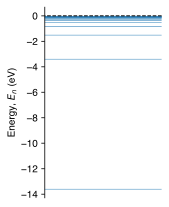

In [5]:
hatom = HydrogenAtom()
hatom.plot_energy_levels(N=15)


# Interpretations of periodic potential

## Nyquist–Shannon sampling theorem

In [6]:
class NyShSampling(object):
    """Class of Nyquist-Shannon sampling theorem.
    """

    def __init__(self,
                 freq: float = 5,
                 amplitude: float = 1,
                 plot_rate: float = 2000):
        """Initialize the class with some attributes.

        Args:
            freq (float, optional): frequency of the signal.
            amp (float, optional): amplitude of the signal.
            plot_rate (float, optional): plotting rate.
        """
        self.freq = freq
        self.amplitude = amplitude
        self.plot_rate = plot_rate

    def plot_signal_and_fft(self,
                            multiplier: float = 1):
        """Plot the signal and its FFT.

        Args:
            multiplier (float): fs_rate/freq.
        """
        t_step = 1/self.plot_rate
        t_plot = np.arange(0, 1, t_step)
        y_signal = self.amplitude*np.sin(2*np.pi*self.freq*t_plot)

        # Sampling signal
        fs_rate = multiplier*self.freq  # Hz
        t_interval = 1/fs_rate

        if multiplier <= 2:
            first_point = 1/(4*self.freq)
            t_sample = np.arange(first_point, 1, t_interval)
        else:
            t_sample = np.arange(0, 1, t_interval)
        y_sample = self.amplitude*np.sin(2*np.pi*self.freq*t_sample)

        # FFT with numpy
        y_fft = np.fft.fft(y_sample)
        N = len(y_fft)
        n = np.arange(N)
        T = N/fs_rate
        freq_fft = n/T

        # Plotting
        fig, ax = plt.subplots(1, 2, figsize=(10, 2))
        ax[0].plot(t_plot, y_signal, color='k', label=f'f = {self.freq} Hz')
        ax[0].plot(t_sample, y_sample, 'o', color='royalblue',
                   ms=5, label=f'fs = {multiplier}f')
        ax[0].set_xlabel('Time (s)')
        ax[0].set_ylabel('Signal')
        ax[0].legend(loc=3, ncol=1, frameon=True, framealpha=0.5)

        if multiplier <= 2:
            ax[1].plot(freq_fft, np.abs(y_fft), '-o',
                       color='royalblue', fillstyle='none')
        else:
            ax[1].plot(freq_fft[0:int(N/2)], np.abs(y_fft)
                       [0:int(N/2)], '-o', color='royalblue', fillstyle='none')
        ax[1].set_xlabel('Frequency (Hz)')
        ax[1].set_ylabel('FFT amplitude')

        fig.tight_layout()
        plt.show()


In [7]:
# Oscillating signal
freq = 5  # Hz
amplitude = 1
plot_rate = 2000  # Hz


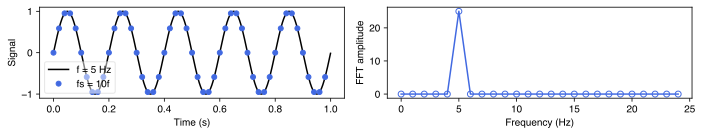

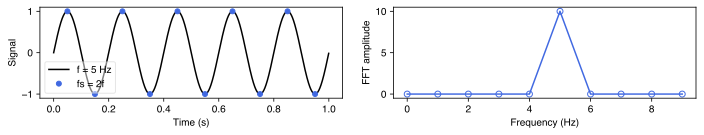

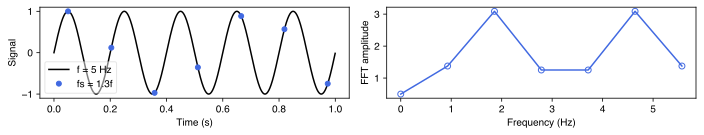

In [8]:
nysh_sampling = NyShSampling(
    freq=freq, amplitude=amplitude, plot_rate=plot_rate)
multiplier_array = [10, 2, 1.3]
for multiplier in multiplier_array:
    nysh_sampling.plot_signal_and_fft(multiplier=multiplier)


## Brillouin Zone

In [9]:
class BZWave(object):
    """Class of waves in Brillouin Zone 
    """

    def __init__(self,
                 a: float = 1,
                 omega: float = 1,
                 k: float = 0.5,
                 n: int = 2):
        """Initialize the class with some attributes.

        Args:
            a (float, optional): lattice period.
            omega (float, optional): angular frequency of oscillation.
            k (float, optional): wave vector coefficient in first BZ.
            n (float, optional): label of wave vector in nth BZ.
        """
        self.a = a
        self.omega = omega
        self.k = k
        self.n = n

    def plot_lattice_wave(self):
        """Plot the lattice wave with wave vectors in two BZ.
        """
        k1 = self.k * np.pi/self.a
        if self.n > 0:
            k2 = k1 + (self.n-1)*2*np.pi/self.a
        elif self.n < 0:
            k2 = k1 + self.n*2*np.pi/self.a
        else:
            raise NotImplementedError("n should either > 0 or < 0")
        x0 = self.a*np.arange(0, 7, 1)

        x = np.linspace(0, 6, num=600)
        t = np.linspace(0, 2*np.pi, num=50)

        x_mesh, t_mesh = np.meshgrid(x, t)
        x0_mesh, t0_mesh = np.meshgrid(x0, t)

        y1 = np.sin(k1*x_mesh - self.omega*t_mesh)
        y2 = np.sin(k2*x_mesh - self.omega*t_mesh)
        p0 = np.sin(k1*x0_mesh - self.omega*t0_mesh)

        fig, ax = plt.subplots(1, 1, figsize=(8, 2.5))

        def animate(i):
            ax.clear()
            wave1, = ax.plot(x_mesh[i], y1[i],
                             color='black', linestyle='-', lw=1)
            wave2, = ax.plot(x_mesh[i], y2[i],
                             color='royalblue', linestyle='-', lw=1)
            points, = ax.plot(x0_mesh[i], p0[i], 'o', color='black')

            ax.set_xlabel('x/a')
            ax.set_xlim([-0.2, 6.2])
            ax.set_ylim([-1.5, 1.5])
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            ax.spines['left'].set_color('none')
            ax.axes.yaxis.set_ticklabels([])
            ax.axes.yaxis.set_ticks([])

            fig.tight_layout()

            return wave1, wave2, points

        anim = FuncAnimation(fig, animate, interval=40, repeat=True, frames=50)
        anim.save(f"../figs/002/bz_k({self.k})_{self.n}k.gif",
                  dpi=300, writer=PillowWriter(fps=25))


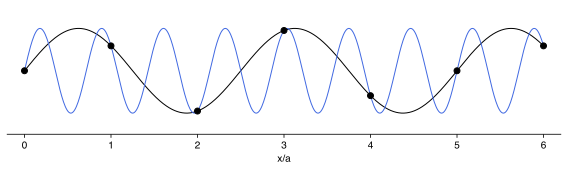

In [12]:
bz_wave = BZWave(k=0.8, n=2)
bz_wave.plot_lattice_wave()
